# Numerische Methoden für Differentialgleichungen

## Aufgabenblatt 1
*gelöst von Stollmayer Max*

### Aufgabe 1
Das System 2. Ordnung

\begin{cases}
    \ddot{y}_1 = t^2 - \dot{y}_1 - y_2^2 \\
    \ddot{y}_2 = t + \dot{y}_2 + y_1^3 \\
    y_1(0)=0, \dot{y}_1(0)=1, y_2(0)=1, \dot{y}_2(0)=0
\end{cases}

wird umgeschrieben zu einem System 1. Ordnung

\begin{cases}
    \dot{y}_1 = y_3 \\
    \dot{y}_2 = y_4 \\
    \dot{y}_3 = t^2 - y_3 - y_2^2 \\
    \dot{y}_4 = t + y_4 + y_1^3 \\
    y_1(0)=0, y_2(0)=1, y_3(0)=1, y_4(0)=0
\end{cases}

### Aufgabe 2

Implementierung des Vorwärts-Euler-Verfahrens für ODE Systeme 1. Ordnung.

#### Definition

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def forward_euler(f, y0, t0, tN, N):
    '''
    Returns list of input values and list of corresponding function values approximated with the forward Euler method
    
    f is the function of the ODE y' = f(y, t)
    t0 and tN are the boundaries of the interval [t0, tN], which is divided into N+1 steps
    y0 is the initial condition y(t0) = y0
    '''
    
    # step size
    h = (tN - t0) / N
    
    # list of input values with step size h
    t = t0 + h * np.arange(N+1)
    
    # array of function vectors starting with the initial value
    y = np.array([y0])
    
    # loop to generate function values with forward euler method
    for n in range(0, N):
        new = y[n] + h * f(y[n], t[n])
        y = np.append(y, [new], axis=0)
    
    return t, y

#### Test 1

In [3]:
def f1(y, t):
    return y

y0_1 = 1
t0_1 = 1
tN_1 = 4
N1 = 10

t1, y1 = forward_euler(f1, y0_1, t0_1, tN_1, N1)

for v in zip(t1, y1):
    print(f"y({v[0]:.1f}) = {v[1]:5.2f}")

y(1.0) =  1.00
y(1.3) =  1.30
y(1.6) =  1.69
y(1.9) =  2.20
y(2.2) =  2.86
y(2.5) =  3.71
y(2.8) =  4.83
y(3.1) =  6.27
y(3.4) =  8.16
y(3.7) = 10.60
y(4.0) = 13.79


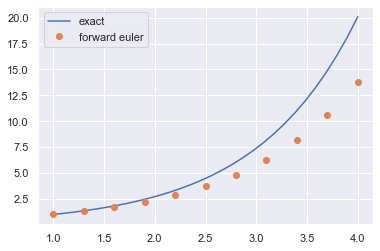

In [4]:
x = np.linspace(1, 4, 30)

plt.plot(x, np.exp(x - 1), label="exact")
plt.plot(t1, y1, "o", label="forward euler")
plt.legend()

#### Test 2

In [5]:
def g(y, t, a, b, c, d):
    return np.array([-(a - b * y[1]) * y[0], (c - d * y[0]) * y[1]])

def f2(y, t):
    return g(y, t, 1, 0.1, 4, 1)

y0_2 = np.array([3, 5])
t0_2 = 0
tN_2 = 10
N2 = 10

t2, y2 = forward_euler(f2, y0_2, t0_2, tN_2, N2)

for x, z in zip(t2, y2):
    print(f"t = {x:2n}:  {z[0]: .2E} predators,  {z[1]: .2E} preys")

t =  0:   3.00E+00 predators,   5.00E+00 preys
t =  1:   1.50E+00 predators,   1.00E+01 preys
t =  2:   1.50E+00 predators,   3.50E+01 preys
t =  3:   5.25E+00 predators,   1.22E+02 preys
t =  4:   6.43E+01 predators,  -3.06E+01 preys
t =  5:  -1.97E+02 predators,   1.82E+03 preys
t =  6:  -3.58E+04 predators,   3.67E+05 preys
t =  7:  -1.31E+09 predators,   1.31E+10 preys
t =  8:  -1.72E+18 predators,   1.72E+19 preys
t =  9:  -2.97E+36 predators,   2.97E+37 preys
t = 10:  -8.81E+72 predators,   8.81E+73 preys


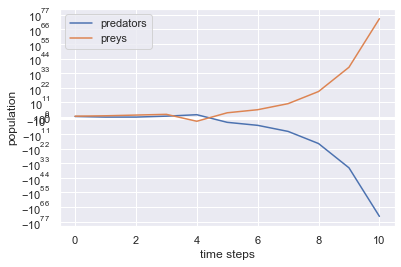

In [6]:
plt.plot(t2, y2[:, 0], label="predators")
plt.plot(t2, y2[:, 1], label="preys")
plt.xlabel("time steps")
plt.ylabel("population")
plt.yscale("symlog")
plt.legend()